In [1]:
import gzip
import json
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter

<h2><center>Top level keys to access data from LOBSTER lightweight JSON files</center></h2>
<table>
    <thead>
    <tr>
        <th>Root Keys</th>
        <th>Data type</th>
        <th>Description</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td>all_bonds</td>
        <td>dict</td>
        <td>Summarized relevant bonds data (See table 2 of the manuscript for details)</td>
    </tr>
    <tr>
        <td>cation_anion_bonds</td>
        <td>dict</td>
        <td>Summarized relevant cation-anion bonds data (See table 2 of the manuscript forfor details)</td>
    </tr>
    <tr>
        <td>madelung_energies</td>
        <td>dict</td>
        <td>Total electrostatic energy for the structure as calculated from the Mulliken and Löwdin charges</td>
    </tr>
    <tr>
        <td>charges</td>
        <td>dict</td>
        <td>Atomic charges with Mulliken and Löwdin population analysis methods as keys. <br>
            Each keys corresponding list follows the order of sites in the crystal structure.</td>
    </tr>
    </tbody>
</table>

In [2]:
def read_lobster_lightweight_json(filename: str):
    """
    This function loads the json.gz files and returns a dictionary with lobsterpy summmarized bonding analysis.
    
    Args:
        filename (str) : name of file
    Returns:
        Returns a dictionary with lobstepy summmarized bonding analysis output.
    """
    with gzip.open(filename, 'rb') as f:
        data = json.loads(f.read().decode('utf-8'))
        
    lobster_data = {}
    for item in data:
        lobster_data.update(item)
   
    return lobster_data

In [3]:
lobster_summary = read_lobster_lightweight_json(filename='../Example_data/Lightweight_jsons/mp-1000.json.gz')

In [4]:
## Keys to access data
lobster_summary.keys()

dict_keys(['cation_anion_bonds', 'all_bonds', 'madelung_energies', 'charges'])

In [5]:
#Atomic charges for the sites in input crystal structure 
lobster_summary['charges']

{'Mulliken': [1.58, -1.58], 'Loewdin': [1.49, -1.49]}

In [6]:
# Madelung energy of the structure
lobster_summary['madelung_energies']

{'Mulliken': -17.68, 'Loewdin': -15.69, 'Ewald_splitting': 3.14}

In [ ]:
# Summarized bonding dictionary for all bonds 
lobster_summary['all_bonds']

### Recreate Lobsterpy automatic analysis plots

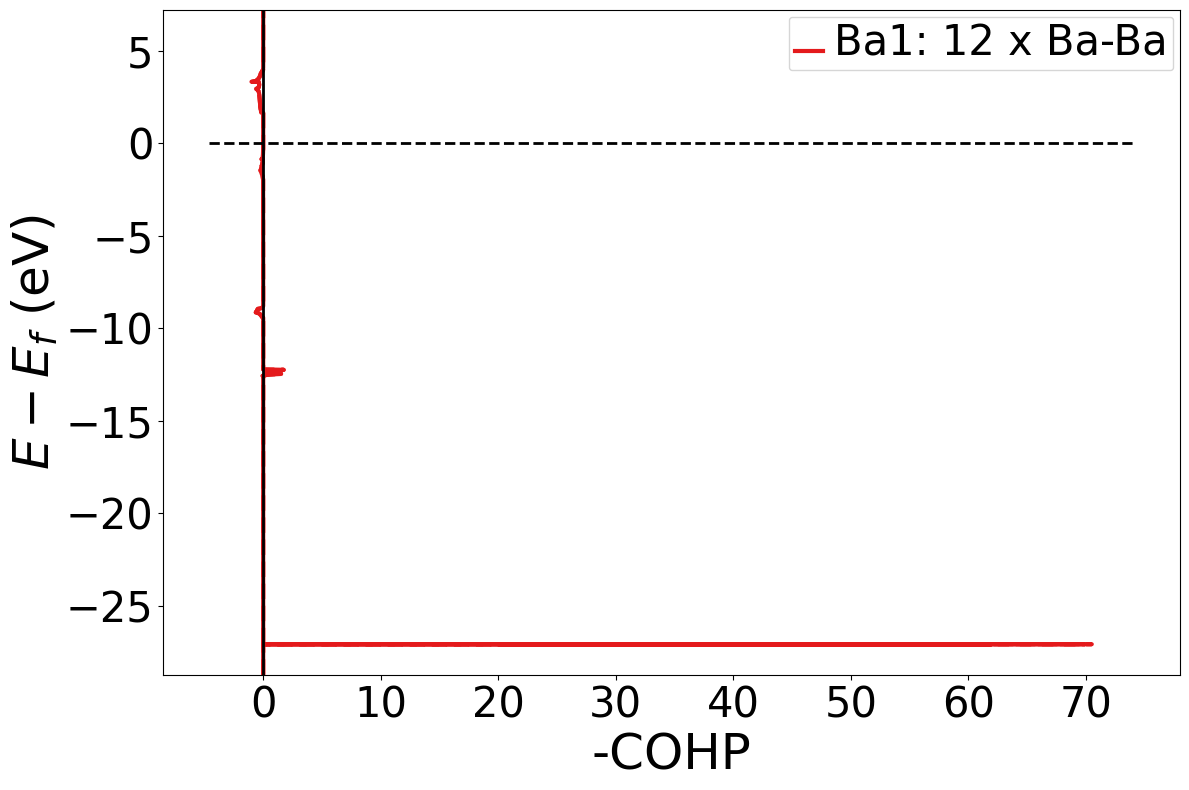

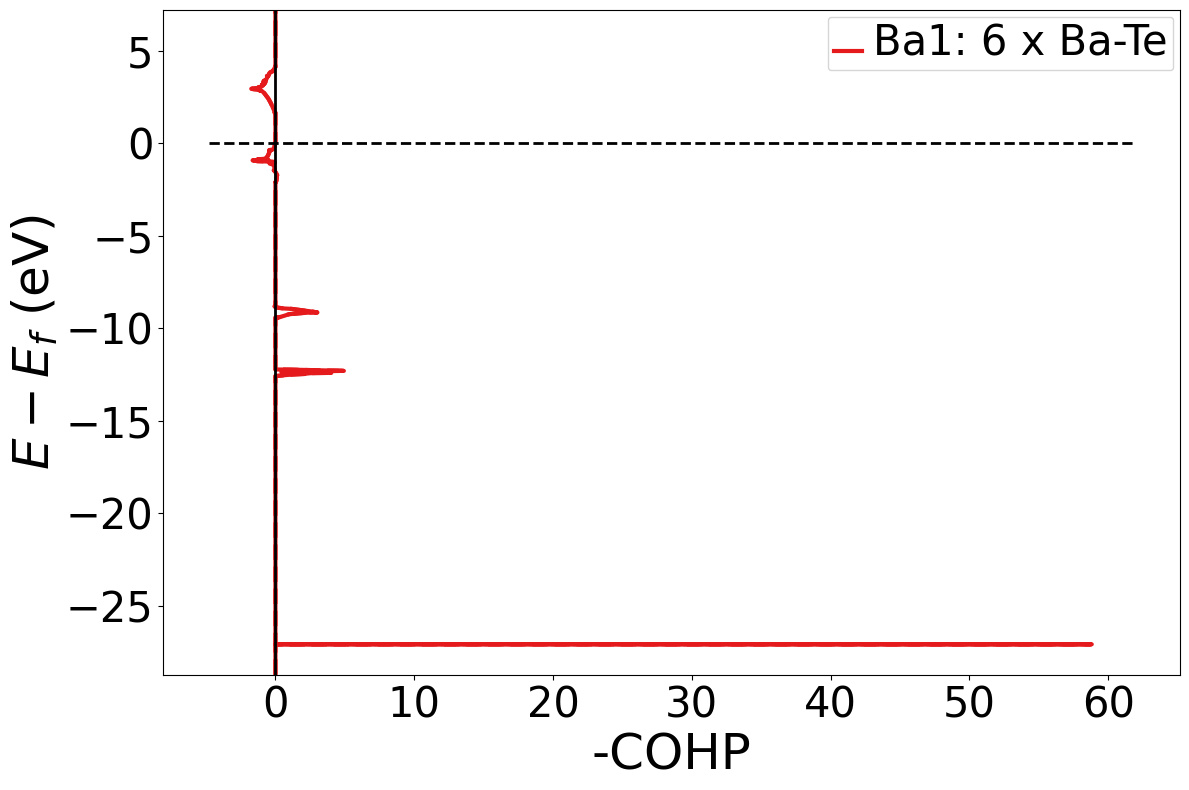

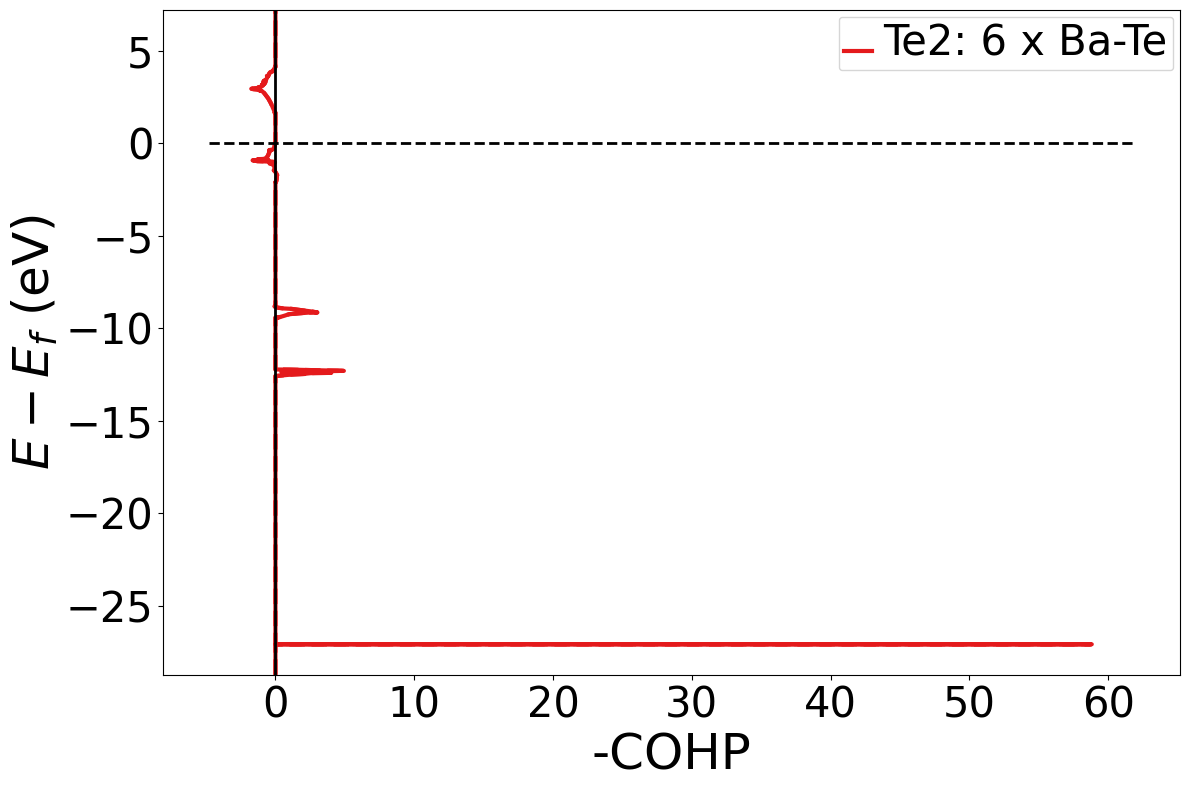

In [7]:
for number, (key, cohp) in enumerate(lobster_summary['all_bonds']["lobsterpy_data"]["cohp_plot_data"].items()):
    plotter = CohpPlotter()
    cohp = Cohp.from_dict(cohp)
    plotter.add_cohp(key, cohp)
    plotter.show()